# Symmetry Mode Analysis

In [8]:
import numpy as np
import csv
import re
import matplotlib
import matplotlib.pyplot as plt
from collections import OrderedDict

In [20]:
def get_data(filepath, cutoff):
    
    with open(filepath) as File:
        content = File.read()
        
    label = re.findall('Pm-3m\[\d*\/?\d*,\d*\/?\d*,\d*\/?\d*\]([A-Z]*\d*[+-?])',content)
    label_content = re.findall('Pm-3m\[\d*\/?\d*,\d*\/?\d*,\d*\/?\d*\]([\s\S]*?)\n\n',content)

    totals = []
    for content in label_content:
        decimals = re.findall('(-?\d+\.\d+)',content)
        totals.append(sum([abs(float(entry)) for entry in decimals]))
    
    data = {label[i]: totals[i] for i in range(len(label))}
    data = OrderedDict(filter(lambda data: data[1] > cutoff ,data.items()))
    data = OrderedDict(sorted(data.items(), key=lambda data: data[1],reverse=True))
    
    return data

def plot_data(data,amp):
    plt.style.use('seaborn-colorblind')
    plt.figure(figsize=(20,10))
    plt.bar(range(len(amp)), amp, align='center')
    plt.xticks(range(len(amp)), list(data.keys()),fontsize=20)
    matplotlib.rc('xtick', labelsize=20) 
    matplotlib.rc('ytick', labelsize=20)
    plt.ylabel("Mode amplitude",fontsize=20)
    plt.axis(ymin=0,ymax=2.2)
    plt.show()

In [21]:
# all phonon modes with amplitude below this cutoff will not be plotted
cutoff=0.1
data_142 = get_data('./data/Symmetry_mode_analysis/SMA_142.txt',cutoff)
data_124 = get_data('./data/Symmetry_mode_analysis/SMA_124.txt',cutoff)
data_88 = get_data('./data/Symmetry_mode_analysis/SMA_88.txt',cutoff)

In [22]:
# need to scale them: Ap = As*sqrt(Vp/Vs)
Vp = 248.87
Vs_142 = 3922.94
Vs_124 = 3845.29
Vs_88 = 3837.00

amp_142 = np.array(list(data_142.values()))*np.sqrt(Vp/Vs_142)
amp_124 = np.array(list(data_124.values()))*np.sqrt(Vp/Vs_124)
amp_88 = np.array(list(data_88.values()))*np.sqrt(Vp/Vs_88)

<ipython-input-20-1782d9c84484>:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


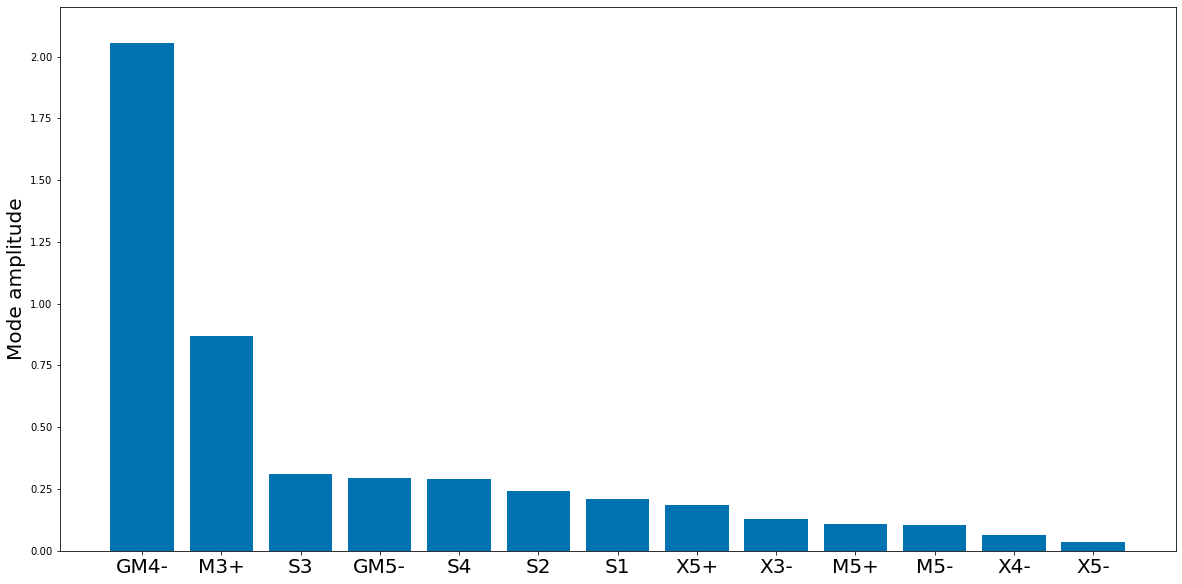

<ipython-input-20-1782d9c84484>:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


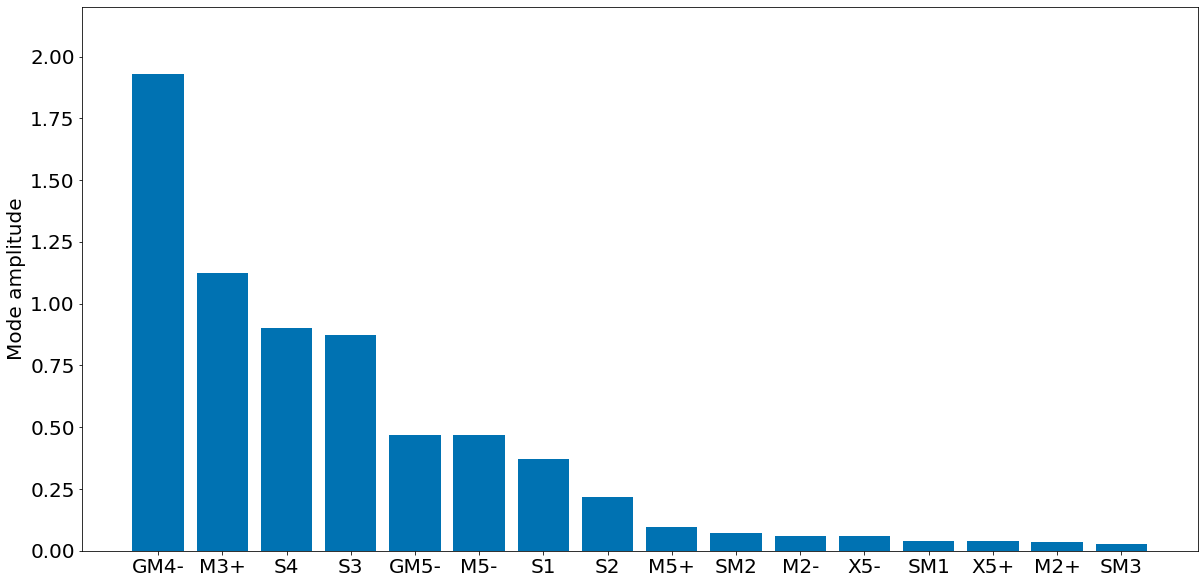

<ipython-input-20-1782d9c84484>:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


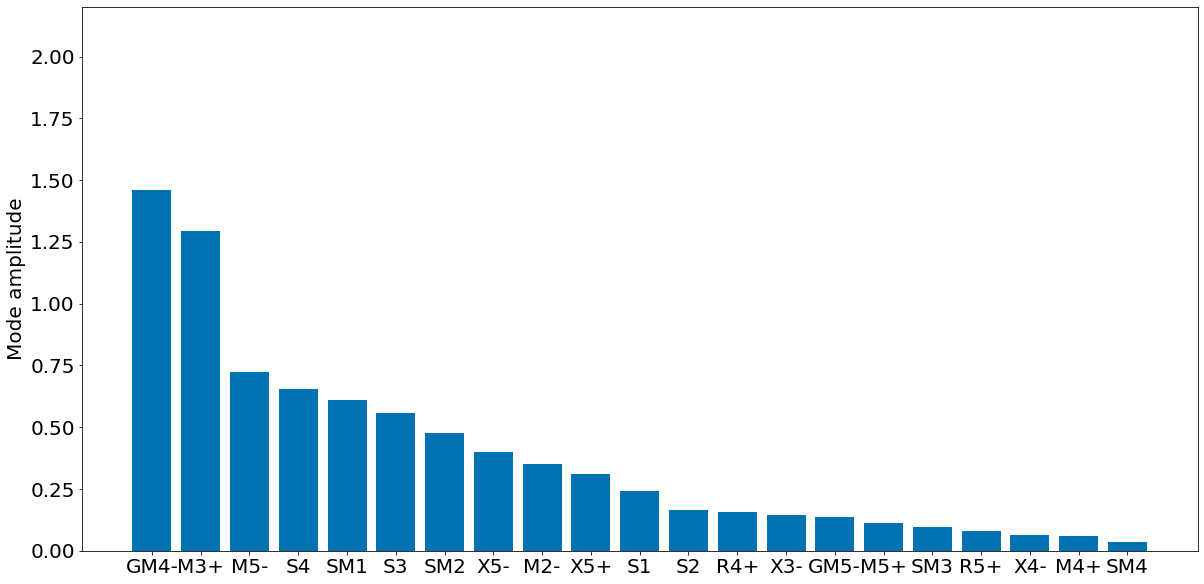

In [23]:
plot_data(data_142,amp_142)
plot_data(data_124,amp_124)
plot_data(data_88,amp_88)